<a href="https://colab.research.google.com/github/iammhk/Maximal-Entropy-Random-Walk/blob/master/DeepWalk_Wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import warnings
from pylab import figure
warnings.filterwarnings('ignore')

In [10]:
np.random.seed(14)
random.seed(14)
df = pd.read_csv("phy.tsv", sep = "\t")
df.head()

G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())
print(len(G))


945


In [11]:
def plot_nodes(word_list):
    X = model.wv[word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(12, 9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()


def plot_nodes3d(word_list):
    X = model.wv[word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=3)
    result = pca.fit_transform(X)

    fig = figure()
    ax = fig.add_subplot(projection='3d')

    # create a scatter plot of the projection
    #plt.scatter(result[:, 0], result[:, 1], result[:, 2])
    for i, word in enumerate(word_list):
        ax.scatter(result[i, 0], result[i, 1], result[i, 2], color='b')
        ax.text(result[i, 0], result[i, 1], result[i, 2], '%s' % (word), size=8, zorder=1,
                color='k')


    plt.show()

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words

    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        for word in self._test_words:  # show wv logic changes
            print(model.wv.most_similar(word))

def get_randomwalk(node, path_length):
    random_walk = [node]

    for i in range(path_length - 1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node

    return random_walk

In [ ]:
# get list of all nodes from the graph
all_nodes = list(G.nodes())
print(all_nodes)
random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n, 10))

# count of sequences
print(len(random_walks))



Loss: 0.0


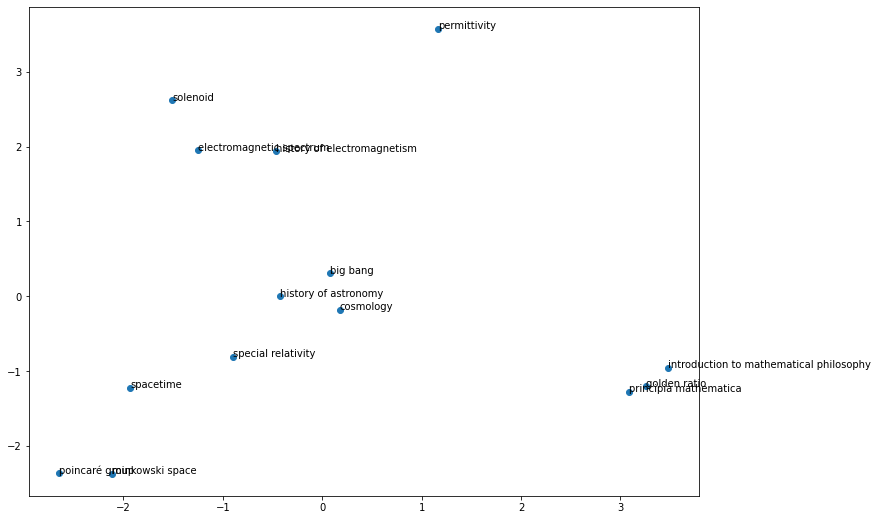

In [13]:
# monitor with demo words for loss
#monitor = MonitorCallback(['space law', 'metalaw', 'moon treaty'])

# train skip-gram (word2vec) model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14, compute_loss=True)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=1000, report_delay=1)

# getting the training loss value
training_loss = model.get_latest_training_loss()
print("Loss:",training_loss)
#print(model.similar_by_word('space tourism'))

#model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

terms=['spacetime', 'special relativity', 'minkowski space', 'poincaré group', 'history of electromagnetism', 'electromagnetic spectrum', 'permittivity', 'solenoid', 	'big bang', 'history of astronomy',	'cosmology', 'principia mathematica', 'golden ratio', 'introduction to mathematical philosophy']
#for i in range(20):    terms.append(all_nodes[np.random.randint(len(all_nodes))])


plot_nodes(terms)